In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
entradas_df_norm_entrenamiento = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\entradas_df_norm_entrenamiento.csv",
                              delimiter= ",", decimal= ".")


In [3]:
entradas_df_norm_pruebas = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\entradas_df_norm_pruebas.csv",
                              delimiter= ",", decimal= ".")

In [4]:
salida_df_entrenamiento = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\salida_df_entrenamiento.csv",
                              delimiter= ",", decimal= ".")
salida_df_entrenamiento = salida_df_entrenamiento["income_<=50K"]

In [5]:
salida_df_pruebas = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\salida_df_pruebas.csv",
                              delimiter= ",", decimal= ".")
salida_df_pruebas = salida_df_pruebas["income_<=50K"]

# 8. Model build

Se establece el modelo, estudiar **keras.Sequential, las funciones de activacion, y el optimizador, junto con la funcion de perdidad loss**

In [345]:
modelo = keras.Sequential()
modelo.add(layers.Dense(2, activation="tanh", input_shape=[len(entradas_df_norm_entrenamiento.keys()), ]))
modelo.add(layers.Dense(2, activation="softmax", input_shape=[len(entradas_df_norm_entrenamiento.keys()), ]))
modelo.add(layers.Dense(2, activation="relu", input_shape=[len(entradas_df_norm_entrenamiento.keys()), ]))
modelo.add(layers.Dense(1, activation="sigmoid"))


Se crea el algoritmo

In [346]:
alg_entrenamiento = tf.keras.optimizers.SGD(learning_rate=0.01)
modelo.compile(loss="BinaryCrossentropy", metrics=["mae", "mse", "AUC"], optimizer=alg_entrenamiento)

# 9. Model preview

In [347]:
modelo.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 2)                 48        
                                                                 
 dense_84 (Dense)            (None, 2)                 6         
                                                                 
 dense_85 (Dense)            (None, 2)                 6         
                                                                 
 dense_86 (Dense)            (None, 1)                 3         
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


# 10. Model probe

In [348]:
modelo.predict(entradas_df_norm_entrenamiento[1:3])

1/1 [==============================] - 0s 125ms/step


array([[0.4818852],
       [0.495604 ]], dtype=float32)

# 11. Model train

In [349]:
history = modelo.fit(
    entradas_df_norm_entrenamiento,
    salida_df_entrenamiento,
    epochs=100,
    validation_split = 0.2,
    verbose=1
)

Epoch 1/100
300/300 [==============================] - 3s 6ms/step - loss: 0.6954 - mae: 0.5010 - mse: 0.2511 - auc: 0.4303 - val_loss: 0.6951 - val_mae: 0.5009 - val_mse: 0.2510 - val_auc: 0.4206
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6943 - mae: 0.5005 - mse: 0.2506 - auc: 0.4589 - val_loss: 0.6940 - val_mae: 0.5004 - val_mse: 0.2504 - val_auc: 0.4692
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6937 - mae: 0.5003 - mse: 0.2503 - auc: 0.4733 - val_loss: 0.6938 - val_mae: 0.5003 - val_mse: 0.2503 - val_auc: 0.4871
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6937 - mae: 0.5002 - mse: 0.2503 - auc: 0.4945 - val_loss: 0.6937 - val_mae: 0.5003 - val_mse: 0.2503 - val_auc: 0.4898
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6936 - mae: 0.5002 - mse: 0.2502 - auc: 0.4939 - val_loss: 0.6937 - val_mae: 0.5002 - val_mse: 0.2503 - val_auc: 0.4896
Epoch 6/100
300

In [328]:
historico = pd.DataFrame(history.history)
historico["Epochs"] = history.epoch

# 12. Model validation

Text(0.5, 1.0, 'Gráfica de función de error')

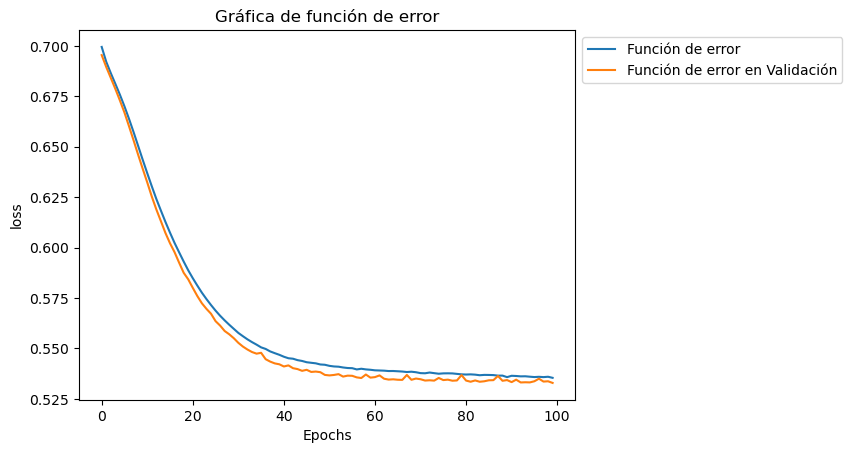

In [329]:
ax001 = sns.lineplot(data=historico, x="Epochs", y="loss", label = "Función de error")
ax001 = sns.lineplot(data=historico, x="Epochs", y="val_loss", label = "Función de error en Validación", ax = ax001)
sns.move_legend(ax001, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica de función de error')

Text(0.5, 1.0, 'Gráfica AUC')

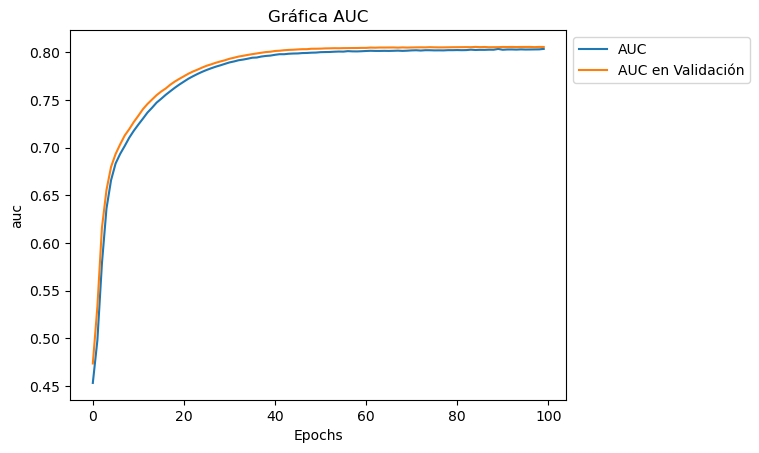

In [330]:
ax002 = sns.lineplot(data=historico, x="Epochs", y="auc", label = "AUC")
ax002 = sns.lineplot(data=historico, x="Epochs", y="val_auc", label = "AUC en Validación", ax = ax002)
sns.move_legend(ax002, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica AUC')

Text(0.5, 1.0, 'Gráfica MSE')

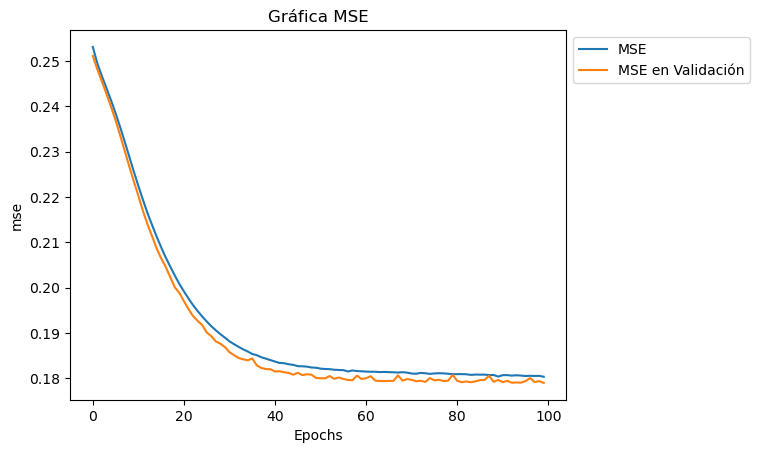

In [331]:
ax003 = sns.lineplot(data=historico, x="Epochs", y="mse", label = "MSE")
ax003 = sns.lineplot(data=historico, x="Epochs", y="val_mse", label = "MSE en Validación", ax = ax003)
sns.move_legend(ax003, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica MSE')

Text(0.5, 1.0, 'Gráfica MAE')

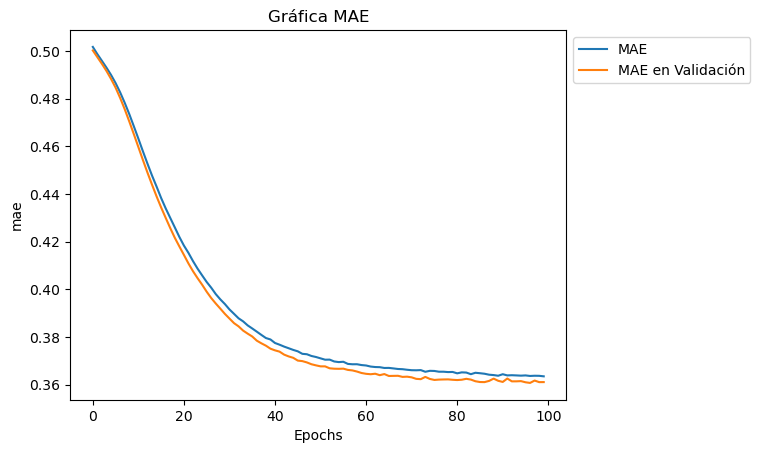

In [332]:
ax004 = sns.lineplot(data=historico, x="Epochs", y="mae", label = "MAE")
ax004 = sns.lineplot(data=historico, x="Epochs", y="val_mae", label = "MAE en Validación", ax = ax004)
sns.move_legend(ax004, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica MAE')

# Validacion con el dataset de pruebas el modelo 

In [333]:
y_pred = modelo.predict(entradas_df_norm_pruebas)
y_pred = np.round(y_pred)

94/94 [==============================] - 0s 2ms/step


In [334]:
cm = confusion_matrix(y_pred, salida_df_pruebas)
print(cm)

[[1160  508]
 [ 350  976]]


In [335]:
vp = cm[0,0]
vn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

# Validacion de metricas necesarias para la validación -> **son 7**

In [336]:
val_accuracy = accuracy_score(salida_df_pruebas, y_pred)

In [337]:
val_f1_score = f1_score(salida_df_pruebas, y_pred)

In [338]:
val_recall_score = recall_score(salida_df_pruebas, y_pred)

In [339]:
val_especificidad = vn/(vn+fp)